In [ ]:
import numpy as np
import pandas as pd
import torch

In [ ]:
!pip install cptac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Step 1: Get Data From CPTAC
import cptac

cptac.download(dataset='endometrial')
endometrial = cptac.Endometrial()

proteomics = endometrial.get_proteomics()
clinical = endometrial.get_clinical()

clinical.head()

Name,Sample_ID,Sample_Tumor_Normal,Proteomics_Tumor_Normal,Country,Histologic_Grade_FIGO,Myometrial_invasion_Specify,Histologic_type,Treatment_naive,Tumor_purity,Path_Stage_Primary_Tumor-pT,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,S001,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,64.0,No,White,Not-Hispanic or Latino,Female,Anterior endometrium,NaN,Unifocal,2.9,1
C3L-00008,S002,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,58.0,No,White,Not-Hispanic or Latino,Female,Posterior endometrium,NaN,Unifocal,3.5,1
C3L-00032,S003,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,50.0,Yes,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,4.5,4 or more
C3L-00090,S005,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,75.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,3.5,4 or more
C3L-00098,S006,Tumor,Tumor,United States,NaN,under 50 %,Serous,YES,Normal,pT1a (FIGO IA),...,63.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,6.0,2


In [ ]:
## Step 2: Join clinical label with proteomics dataset
label = "Histologic_type"
clin_prot = endometrial.join_metadata_to_omics(
    metadata_df_name="clinical",
    omics_df_name="proteomics",
    metadata_cols=[label]
)
clin_prot.head()

Name,Histologic_type,A1BG_proteomics,A2M_proteomics,A2ML1_proteomics,A4GALT_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,...,ZSWIM8_proteomics,ZSWIM9_proteomics,ZW10_proteomics,ZWILCH_proteomics,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics,ZZZ3_proteomics
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,Endometrioid,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
C3L-00008,Endometrioid,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
C3L-00032,Endometrioid,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
C3L-00090,Endometrioid,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
C3L-00098,Serous,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


In [ ]:
## Step 3a: Remove NaN values from the label column
print("Value counts before dropping:\n", clin_prot[label].value_counts(dropna=False))
clin_prot = clin_prot.dropna(subset=[label])
print("\n\nValue counts after dropping:\n", clin_prot[label].value_counts(dropna=False))

Value counts before dropping:
 Endometrioid    83
NaN             49
Serous          12
Name: Histologic_type, dtype: int64


Value counts after dropping:
 Endometrioid    83
Serous          12
Name: Histologic_type, dtype: int64


In [ ]:
## Step 3b: Find how many NaN values are in each column
def calc_percent_nan(df, gene):
  
  len_df = len(df.index)
  num_nan = sum(df[gene].isna())

  return round(100*(num_nan / len_df),2)

percent_nan = {}

for gene in clin_prot.columns:
  percent_nan[gene] = {}
  percent_nan[gene]["percent_nan"] = calc_percent_nan(clin_prot, gene)

percent_nan_df = pd.DataFrame.from_dict(percent_nan).T
percent_nan_df.sort_values(by=["percent_nan"], ascending=False).head()

,percent_nan
XCL1_proteomics,100.0
DPF3_proteomics,100.0
ZNF805_proteomics,100.0
GAST_proteomics,100.0
ZNF79_proteomics,100.0


In [ ]:
## Step 3c: Remove features with NaN values
nan_filter = percent_nan_df['percent_nan'] > 0
too_many_nans = list(percent_nan_df[nan_filter].index)
total_features = len(clin_prot.columns) - 1 #Subtract 1 for label column
num_removed = len(too_many_nans)

clin_prot = clin_prot.drop(columns=too_many_nans)
print("Features removed:", num_removed)
print("Percent removed: {}%".format(round(100*(num_removed / total_features),2)))

Features removed: 2983
Percent removed: 27.12%


In [ ]:
## Step 4: Separate label and features
X = clin_prot.copy()
y = X.pop(label)
y

Patient_ID
C3L-00006    Endometrioid
C3L-00008    Endometrioid
C3L-00032    Endometrioid
C3L-00090    Endometrioid
C3L-00098          Serous
                 ...     
C3N-01520    Endometrioid
C3N-01521    Endometrioid
C3N-01537    Endometrioid
C3N-01802          Serous
C3N-01825          Serous
Name: Histologic_type, Length: 95, dtype: object

In [ ]:
## Step 5: Map string categories to binary yes/no on the label Endometrioid/Serous

y_map = {
    "Endometrioid": 1,
    "Serous": 0
}

y = y.map(y_map)

In [ ]:
y

Patient_ID
C3L-00006    1
C3L-00008    1
C3L-00032    1
C3L-00090    1
C3L-00098    0
            ..
C3N-01520    1
C3N-01521    1
C3N-01537    1
C3N-01802    0
C3N-01825    0
Name: Histologic_type, Length: 95, dtype: int64

In [ ]:
## Step 6: Over-sample minority class: Serous (1)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1    83
0    83
Name: Histologic_type, dtype: int64

In [ ]:
## Step 7: Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
## Step 8: Create Keras model and train

from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=[len(X.columns)]),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y=y_train,
    batch_size=36,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 1s 10ms/step - loss: 0.4786 - accuracy: 0.7576
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.9621
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0296 - accuracy: 0.9924
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 6.1419e-04 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 4.1138e-04 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 2.5588e-04 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 10ms/step - loss: 1.7648e-04 - accuracy: 1.0000


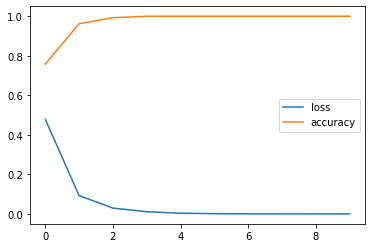

In [ ]:
## Step 9: Plot network loss and accuracy over each epoch
loss_df = pd.DataFrame(history.history)
loss_df.plot()

In [ ]:
## Step 10: Evaluate results on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\n\ntest_loss:", test_loss)
print("test_accuracy:", test_accuracy)

2/2 [==============================] - 0s 12ms/step - loss: 0.7287 - accuracy: 0.9118


test_loss: 0.7286995053291321
test_accuracy: 0.9117646813392639


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 1/10
7/7 [==============================] - 1s 12ms/step - loss: 0.6254 - accuracy: 0.6061
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2982 - accuracy: 0.8409
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1459 - accuracy: 0.9470
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 0.9924
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9924
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0425 - accuracy: 0.9924
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9924
Epoch 8/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0110 - accuracy: 0.9924
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 4.9018e-04 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 1.0156 - accuracy: 0.9412


test_loss: 1.01562440395355

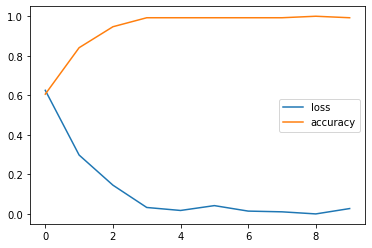

In [ ]:
## Step 11: Put it all together
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow
from tensorflow.keras import layers, callbacks
import pandas as pd

# tensorflow.compat.v1.disable_v2_behavior() ## Compatability issue when using shap.DeepExplainer.  Reverting to v1

## Get Data
label = "Histologic_type"
clin_prot = endometrial.join_metadata_to_omics(
    metadata_df_name="clinical",
    omics_df_name="proteomics",
    metadata_cols=[label]
)

## Remove NaN and separate features from label
clin_prot = clin_prot.dropna(subset=[label])
X = clin_prot.dropna(axis=1)
y = X.pop(label)

## Over-sample minority class: Serous
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Encode label
encoder = LabelEncoder()
y = encoder.fit_transform(y)

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Create model
def define_model(num_nodes=64, input_shape=len(X.columns), dropout=0.2, num_layers=4):

  ## Initialize network
  model = tensorflow.keras.Sequential()

  ## Input Layer
  model.add(layers.Dense(num_nodes, activation='relu', input_shape=[input_shape]))

  ## Hidden Layers
  for i in range(num_layers):
    model.add(layers.Dense(num_nodes, activation='relu'))
    model.add(layers.Dropout(dropout))
    # model.add(layers.BatchNormalization())

  ## Output Layer
  model.add(layers.Dense(1, activation='sigmoid'))

  ## Choose optimizer, loss, and evaluation metrics
  model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
  )

  return model

model = define_model(
    num_nodes=100, 
    input_shape=len(X.columns),
    dropout=0.3,
    num_layers=4
)

history = model.fit(X_train, y=y_train, batch_size=20, epochs=10)
history_df = pd.DataFrame(history.history)
history_df.plot()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\n\ntest_loss:", test_loss)
print("test_accuracy:", test_accuracy)

2/2 [==============================] - 0s 9ms/step
Accuracy: 0.9411764705882353 
F1: 0.9333333333333333


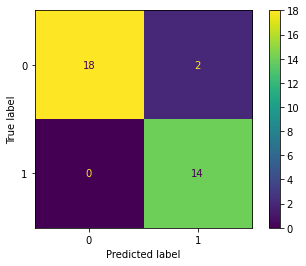

In [ ]:
## Evaluate model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_class = y_pred > 0.5
y_pred_class = y_pred_class.astype(int)

cm = confusion_matrix(y_test, y_pred_class)

ConfusionMatrixDisplay(cm).plot()

acc = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Accuracy:", acc, "\nF1:", f1)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Come back to this.  There are tons of features for not very many records, and this is a problem for SHAP
# import shap

# explainer = shap.KernelExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/34 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.537e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.537e-02, with an active set of 3 regressors

ValueError: ignored